<a href="https://colab.research.google.com/github/sankarsh777/GDSC-AIML-SANKARSH-B241162ME/blob/main/beginner_question3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("/content/Student Insomnia and Educational Outcomes Dataset_version-2.csv")
print(df.head())
df.columns
year_col = '1. What is your year of study?'
gender_col = '2. What is your gender?'
difficulty_sleep_col = '3. How often do you have difficulty falling asleep at night? '
sleep_hours_col = '4. On average, how many hours of sleep do you get on a typical day?'
night_wakeup_col = '5. How often do you wake up during the night and have trouble falling back asleep?'
sleep_quality_col = '6. How would you rate the overall quality of your sleep?'
concentration_col = '7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?'
fatigue_col = '8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?'
miss_class_col = '9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?'
assignment_impact_col = '10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?'
screen_col = '11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?'
caffeine_col = '12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?'
activity_col = '13. How often do you engage in physical activity or exercise?'
stress_col = '14. How would you describe your stress levels related to academic workload?'
performance_col = '15. How would you rate your overall academic performance (GPA or grades) in the past semester?'

             Timestamp 1. What is your year of study? 2. What is your gender?  \
0  10/24/2024 16:51:15               Graduate student                    Male   
1  10/24/2024 16:51:51                     Third year                    Male   
2  10/24/2024 16:52:21                     First year                  Female   
3  10/24/2024 16:53:00                     Third year                    Male   
4  10/24/2024 16:53:25               Graduate student                    Male   

  3. How often do you have difficulty falling asleep at night?   \
0                           Often (5-6 times a week)              
1                           Often (5-6 times a week)              
2                       Sometimes (3-4 times a week)              
3                           Often (5-6 times a week)              
4                           Often (5-6 times a week)              

  4. On average, how many hours of sleep do you get on a typical day?  \
0                                    

In [310]:

def map_frequency(x):
    x = str(x).lower()
    if "never" in x:
        return 0
    elif "rare" in x:
        return 1
    elif "sometimes" in x:
        return 2
    elif "often" in x:
        return 3
    else:
      return 4
def map_stress(x):
    x = str(x).lower()
    if "low" in x:
        return 1
    elif "moderate" in x:
        return 2
    elif "high" in x and "extreme" not in x:
        return 3
    else:
      return 4

def map_performance(x):
    x = str(x).lower()
    if "poor" in x and "below" not in x:
        return 0
    elif "below" in x:
        return 1
    elif "average" in x:
        return 2
    elif "good" in x:
        return 3
    else:
      return 4

def map_sleep_hours(x):
    x = str(x)
    if "less than 4" in x:
        return 1
    elif "4-5" in x:
        return 2
    elif "5-6" in x:
        return 3
    elif "6-7" in x:
        return 4
    elif "7-8" in x:
        return 5
    else:
        return 6
def map_gender(x):
  x = str(x)
  if "male" in x:
    return 0
  else:
    return 1
def year_map(x):
  x = str(x)
  if "first" in x:
    return 1
  elif 'second' in x:
    return 2
  elif 'third' in x:
    return 3
  else:
    return 4
df_model = pd.DataFrame({
    'year': df[year_col].map(year_map),
    'gender': df[gender_col].map(map_gender),
    'difficulty_sleep': df[difficulty_sleep_col].apply(map_frequency),
    'sleep_hours': df[sleep_hours_col].map(map_sleep_hours),
    'night_wakeup': df[night_wakeup_col].apply(map_frequency),
    'sleep_quality': df[sleep_quality_col].apply(map_frequency),
    'concentration': df[concentration_col].apply(map_frequency),
    'fatigue': df[fatigue_col].apply(map_frequency),
    'miss_class': df[miss_class_col].apply(map_frequency),
    'assignment_impact': df[assignment_impact_col].apply(map_frequency),
    'screen_time': df[screen_col].apply(map_frequency),
    'caffeine': df[caffeine_col].apply(map_frequency),
    'activity': df[activity_col].apply(map_frequency),
    'stress': df[stress_col].apply(map_stress),
    'score': df[performance_col].apply(map_performance)
})
df_model = df_model.astype("int64")
df_model



,year,gender,difficulty_sleep,sleep_hours,night_wakeup,sleep_quality,concentration,fatigue,miss_class,assignment_impact,screen_time,caffeine,activity,stress,score
0,4,1,3,5,3,4,2,3,3,4,3,1,2,3,2
1,4,1,3,5,3,4,3,2,2,4,2,2,2,1,3
2,4,0,2,5,2,4,3,3,2,4,3,3,3,3,1
3,4,1,3,6,2,4,3,3,1,4,2,2,4,4,4
4,4,1,3,5,3,4,4,2,2,4,2,2,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,4,0,3,6,4,4,3,4,2,4,4,4,3,4,2
992,4,0,1,4,2,4,1,1,2,4,3,0,1,1,3
993,4,0,0,6,2,4,1,1,1,4,0,3,1,3,2
994,4,1,2,6,0,4,0,1,3,4,2,1,4,4,4


In [311]:
X = df_model.drop('score', axis=1)
y = df_model['score']

m = len(X)




In [312]:

X_train, X_test = X[:int(0.8*m)], X[int(0.8*m):]
y_train, y_test = y[:int(0.8*m)], y[int(0.8*m):]



In [313]:


def train_reg(X, y, epochs=1000, lr=0.01):
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=float)

    m, n = X.shape

    w = np.zeros(n)
    b = 0.0

    for _ in range(epochs):

        y_pred = np.dot(X,w) + b

        dw = np.dot(X.T,y_pred - y) / m
        db = np.sum(y_pred - y) / m

        w -= lr * dw
        b -= lr * db

    return w, b


In [314]:
def cal_mae(y_pred, y_true):
    y_pred = np.asarray(y_pred, dtype=float)
    y_true = np.asarray(y_true, dtype=float)
    return np.mean(np.abs(y_true - y_pred))

In [315]:
lrs = [0.001,0.01]
mae_min = np.inf
lr_best = 0
w_best, b_best = None, None
for i in lrs:

  w, b = train_reg(X_train,y_train,epochs = 10000, lr = i)
  y_pred = np.dot(X_test,w) + b
  mae = cal_mae(y_pred, y_test)
  if mae< mae_min:
    mae_min = mae
    lr_best = i
    w_best = w
    b_best = b
print(mae_min, lr_best)



0.7036452348380823 0.001


In [316]:
def predict(X, w, b):
    y_pred = X @ w + b   # numeric predictions
    labels = []

    for val in y_pred:
        if val < -1.5:
            labels.append("poor")
        elif -1.5 <= val < -0.5:
            labels.append("below average")
        elif -0.5 <= val < 0.5:
            labels.append("average")
        elif 0.5 <= val < 1.5:
            labels.append("good")
        else:
            labels.append("excellent")

    return labels

y_text = predict(X_test,w_best,b_best)

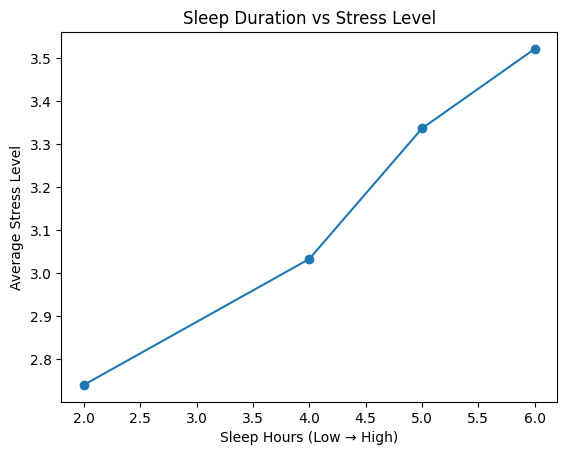

In [317]:
df_model.groupby("sleep_hours")["score"].mean()

sleep_stress = df_model.groupby("sleep_hours")["stress"].mean()

plt.figure()
plt.plot(sleep_stress.index, sleep_stress.values, marker='o')
plt.xlabel("Sleep Hours (Low → High)")
plt.ylabel("Average Stress Level")
plt.title("Sleep Duration vs Stress Level")
plt.show()



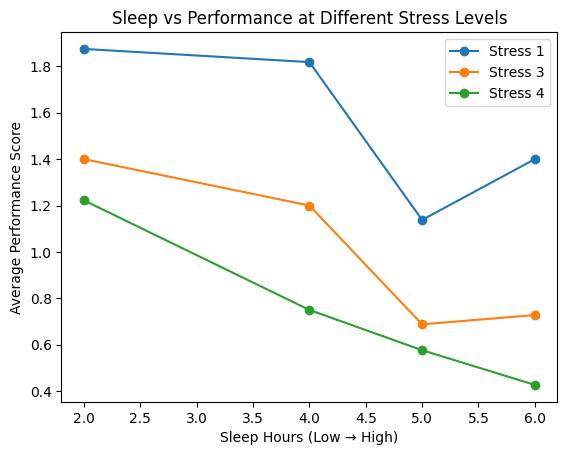

In [318]:
pivot = df_model.pivot_table(
    values="score",
    index="sleep_hours",
    columns="stress",
    aggfunc="mean"
)

plt.figure()
for s in pivot.columns:
    plt.plot(pivot.index, pivot[s], marker='o', label=f"Stress {s}")

plt.xlabel("Sleep Hours (Low → High)")
plt.ylabel("Average Performance Score")
plt.title("Sleep vs Performance at Different Stress Levels")
plt.legend()
plt.show()
